In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir():
    if file.endswith(".csv"):
        n += 1

print(n)

32


In [4]:
#Importo los promedios, que van a ser todos los .csv dividido dos (ya que hay el doble, porque las desviaciones están aparte)
data=[]
for i in range(int(n/2)):
    i=i+1
    data.append(pd.read_csv(f"promedio_{i}.csv"))

data=pd.concat(data)
#print(data)

In [19]:
#Armo el eje x, el tiempo, en escala de días

t_0=np.array([0,11/24,15/24,1+2/24, 1+6.5/24, 1+17/24, 1+21/24, 2 +1/24, 2+5/24]) #hasta la carpeta 6 inclusive

t_7=2+ np.array([10.30/24,15.30/24,20.30/24, 1+1.30/24, 1+6.30/24, 1+11.30/24]) #correspondiente a la carpeta 7

t_8=3+ np.array([18/24,1,1+6/24,1+12/24,1+18/24])

t_9=np.array([5+8/24]) #correspondiente a carpeta 9

t_10=5+ np.array([14/24,20/24,1+2/24,1+8/24,1+14/24,1+20/24,2+2/24,2+8/24,2+14/24]) #carpeta 10

#FALLA, SE PIERDEN 5 DATOS: 1.25 días
#falla=7+np.array([20/24,1+2/24,1+8/24,1+14/24,1+20/24])

t_11= t_10[-1] + 5*6/24 + 6/24+ np.arange(0,6*6/24,6/24) #LE SUMO EL FALLO, LAS 5 MEDICIONES

t_12=np.array([t_11[-1]+(16.5-8)/24])

t_13=t_12+(23.5-16.5)/24

t_14=t_13+14/24 #fueron 14 horas después de la última medición

t_15=t_14[-1] + (18.30-13.30)/24 + np.array([0,3/24,6/24,9/24]) #archivo 15, 3 mediciones buenas y una maso

t_16= t_15[-1] + (12-3)/24 + np.arange(0,11*3/24,3/24) #le sumo el fallo

t=np.concatenate((t_0,t_7,t_8,t_9,t_10,t_11,t_12,t_13,t_14,t_15,t_16))#,t_12))
print(len(t))

54


In [16]:
t_15[-1]

12.145833333333334

In [17]:
t_15[-1] + (12-3)/24 + np.arange(0,11*3/24,3/24) #le sumo el fallo

array([12.52083333, 12.64583333, 12.77083333, 12.89583333, 13.02083333,
       13.14583333, 13.27083333, 13.39583333, 13.52083333, 13.64583333,
       13.77083333])

In [20]:
c_1=np.array([data['promedio1']]) #Blanco
c_2=np.array([data['promedio2']]) #Starch
c_3=np.array([data['promedio3']]) #TPS
c_4=np.array([data['promedio4']]) #TPS-NPTiO

print(len(c_1[0]))

54


La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [21]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(h,C): #meter el área
    return F *C*h*60* 44 / (den)

#Se le introduce la cantidad de horas a la cual se va a proyectar (h) y la CONCENTRACIÓN
#Se proyecta que eso emite durante 6h, pero como tiene que estar en minutos, se multiplica por 6*60

In [22]:
c_4[0]

array([ 775.        , 1020.        , 1186.69635628, 1235.584     ,
       1086.23076923, 1644.55060729, 1950.        , 1738.7611336 ,
       1590.34817814, 1203.80566802, 1120.10931174, 1138.14574899,
       1011.98387097, 1531.42105263, 1614.36693548, 1545.68421053,
       1596.16194332, 1335.93522267, 1142.92307692,  677.98380567,
        577.31983806,  527.6437247 ,  499.62753036, 1509.60323887,
        829.82995951,  551.38461538,  543.46963563, 1298.29554656,
        720.62753036,  684.22267206, 1153.1733871 ,  695.06451613,
        539.81451613,  574.5       ,  403.39919355,  417.14919355,
       1765.16194332,  839.72064777,  725.66089965,  603.17813765,
        599.42105263,  522.36437247,    0.        ,  436.76923077,
        542.36437247,  433.65587045, 1331.92307692, 1127.07287449,
        847.39676113,  753.99190283,  594.84210526,  514.82591093,
        449.45748988,    0.        ])

In [23]:
c_4[0][39:43]

array([603.17813765, 599.42105263, 522.36437247,   0.        ])

In [27]:
#RECORDAR QUE [incluye:noincluye]

#Los primeros 5 los proyecto por 6 h
#Del 5 al 9 los proyecto por 4 h
#Del 9 al 15 los proyecto por 5 h
#Del 15 al 20 los proyecto por 6h
#El 21, que corresponde a la carpeta 9, lo proyecto por 6 h
#El 40 al 43, carpeta 15, lo proyecto por 3 h


gramos1=np.concatenate((gramos(6,c_1[0][0:5]),gramos(4,c_1[0][5:10]),gramos(5,c_1[0][10:16]),gramos(6,c_1[0][16:39]),gramos(3,c_1[0][39:])))
gramos2=np.concatenate((gramos(6,c_2[0][0:5]),gramos(4,c_2[0][5:10]),gramos(5,c_2[0][10:16]),gramos(6,c_2[0][16:39]),gramos(3,c_2[0][39:])))
gramos3=np.concatenate((gramos(6,c_3[0][0:5]),gramos(4,c_3[0][5:10]),gramos(5,c_3[0][10:16]),gramos(6,c_3[0][16:39]),gramos(3,c_3[0][39:])))
gramos4=np.concatenate((gramos(6,c_4[0][0:5]),gramos(4,c_4[0][5:10]),gramos(5,c_4[0][10:16]),gramos(6,c_4[0][16:39]),gramos(3,c_4[0][39:])))

In [28]:
gramos1_ac=np.add.accumulate(gramos1)
gramos2_ac=np.add.accumulate(gramos2)
gramos3_ac=np.add.accumulate(gramos3)
gramos4_ac=np.add.accumulate(gramos4)

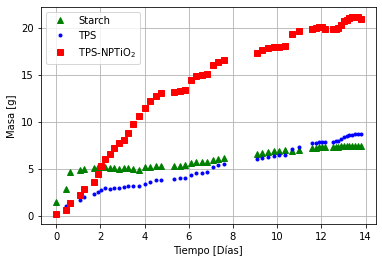

In [29]:
plt.plot(t,gramos2_ac-gramos1_ac,'^',label='Starch',color='green')
plt.plot(t,gramos3_ac-gramos1_ac,'.',label='TPS',color='blue')
plt.plot(t,gramos4_ac-gramos1_ac,'s',label='TPS-NPTiO$_2$',color='red')

plt.legend()

#plt.title('CO2 acumulado - sensor- restado')
plt.xlabel('Tiempo [Días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.savefig("co2_acumulado-sensor_segunda-medicion-restado.png")
plt.show()